<a href="https://colab.research.google.com/github/CamilloDias/projeto_aplicado/blob/main/Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Confiabilidade utilizando Weibull

Passo 1: Importar as bibliotecas necessárias

In [ ]:
!pip install predictr
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import predictr
from predictr import Analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Passo 2: Definir a amostra de tempos até a falha em km

In [ ]:
x = [200000,130000, 120000, 70000, 250000, 187000, 140000, 232000, 116000, 87000, 97000, 110000]


Passo 3: Estimar os parâmetros da distribuição de Weibull usando o método de máxima verossimilhança

In [ ]:
shape, loc, scale = st.weibull_min.fit(x, loc=0)

Passo 4: Calcular a PDF, CDF, R(t), F(t) e taxa de falhas

In [ ]:
t = np.linspace(0, 300000, 1000)

pdf = st.weibull_min.pdf(t, shape, loc, scale)
cdf = st.weibull_min.cdf(t, shape, loc, scale)
reliability = np.exp(-st.weibull_min.cdf(t, shape, loc, scale))
failure_rate = (shape/scale)*(t/scale)**(shape-1)

# F(t) = 1 - R(t)
failure_prob = 1 - reliability


Passo 5: Plotar os gráficos

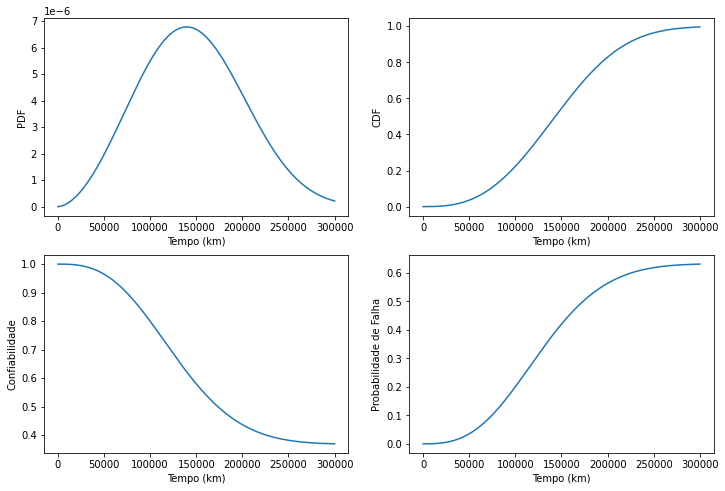

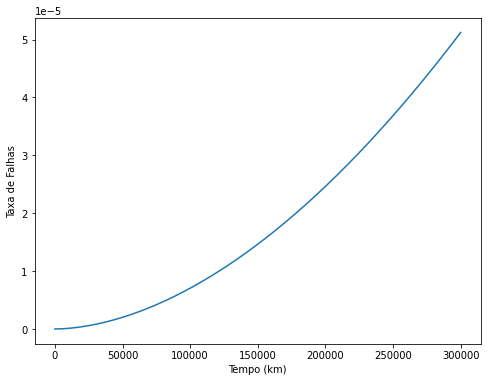

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# PDF
axs[0, 0].plot(t, pdf)
axs[0, 0].set_xlabel('Tempo (km)')
axs[0, 0].set_ylabel('PDF')

# CDF
axs[0, 1].plot(t, cdf)
axs[0, 1].set_xlabel('Tempo (km)')
axs[0, 1].set_ylabel('CDF')

# R(t)
axs[1, 0].plot(t, reliability)
axs[1, 0].set_xlabel('Tempo (km)')
axs[1, 0].set_ylabel('Confiabilidade')

# F(t)
axs[1, 1].plot(t, failure_prob)
axs[1, 1].set_xlabel('Tempo (km)')
axs[1, 1].set_ylabel('Probabilidade de Falha')

# Taxa de falhas
fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.plot(t, failure_rate)
ax2.set_xlabel('Tempo (km)')
ax2.set_ylabel('Taxa de Falhas')

plt.show()


In [ ]:
# Inserir valor de quilometragem para prever probabilidade de falha e confiabilidade
x_input = float(input('Insira o valor de quilometragem para prever a probabilidade de falha e confiabilidade: '))

# Calcular probabilidade de falha
prob_fail = st.weibull_min.sf(x_input, shape, loc, scale)
print('Probabilidade de falha em {:.0f} km: {:.2%}'.format(x_input, prob_fail))

# Calcular confiabilidade
reliability = st.weibull_min.cdf(x_input, shape, loc, scale)
print('Confiabilidade em {:.0f} km: {:.2%}'.format(x_input, reliability))


Insira o valor de quilometragem para prever a probabilidade de falha e confiabilidade: 120000
Probabilidade de falha em 120000 km: 65.59%
Confiabilidade em 120000 km: 34.41%


In [ ]:
# Calcular o intervalo de confiança bootstrap para a distribuição de Weibull
n_bootstraps = 10000
shape_boot = np.empty(n_bootstraps)
scale_boot = np.empty(n_bootstraps)

for i in range(n_bootstraps):
    sample_boot = np.random.choice(x, size=len(x), replace=True)
    shape_boot[i], loc_boot, scale_boot[i] = st.weibull_min.fit(sample_boot, floc=0)

# Calcular limites superior e inferior do intervalo de confiança para a probabilidade de falha e confiabilidade
prob_fail_upper = st.weibull_min.sf(x_input, np.percentile(shape_boot, 97.5), 0, np.percentile(scale_boot, 97.5))
prob_fail_lower = st.weibull_min.sf(x_input, np.percentile(shape_boot, 2.5), 0, np.percentile(scale_boot, 2.5))
print('Intervalo de confiança de 95% para a probabilidade de falha em {:.0f} km: {:.2%} - {:.2%}'.format(x_input, prob_fail_lower, prob_fail_upper))

reliability_upper = st.weibull_min.cdf(x_input, np.percentile(shape_boot, 97.5), 0, np.percentile(scale_boot, 97.5))
reliability_lower = st.weibull_min.cdf(x_input, np.percentile(shape_boot, 2.5), 0, np.percentile(scale_boot, 2.5))
print('Intervalo de confiança de 95% para a confiabilidade em {:.0f} km: {:.2%} - {:.2%}'.format(x_input, reliability_lower, reliability_upper))


Intervalo de confiança de 95% para a probabilidade de falha em 120000 km: 41.96% - 89.19%
Intervalo de confiança de 95% para a confiabilidade em 120000 km: 58.04% - 10.81%


Mostrando a distribuição de Weibull

Parâmetros da distribuição de Weibull:
Beta (shape): 2.81
Eta (scale): 163662.79


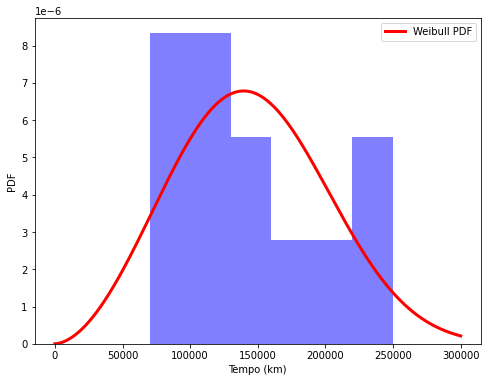

In [ ]:
# Plotar a distribuição de Weibull com os dados de falha plotados
fig3, ax3 = plt.subplots(figsize=(8, 6))

# Histograma dos dados de falha
ax3.hist(x, bins=6, density=True, alpha=0.5, color='blue')

# Distribuição de Weibull ajustada
x_dist = np.linspace(0, 300000, 1000)
y_dist = st.weibull_min.pdf(x_dist, shape, loc, scale)
ax3.plot(x_dist, y_dist, 'r-', lw=3, label='Weibull PDF')

ax3.set_xlabel('Tempo (km)')
ax3.set_ylabel('PDF')
ax3.legend()

# Mostrar o valor dos parâmetros da distribuição de Weibull beta e eta
print('Parâmetros da distribuição de Weibull:')
print('Beta (shape): {:.2f}'.format(shape))
print('Eta (scale): {:.2f}'.format(scale))

plt.show()


Regressão linear e ajuste da distribuição

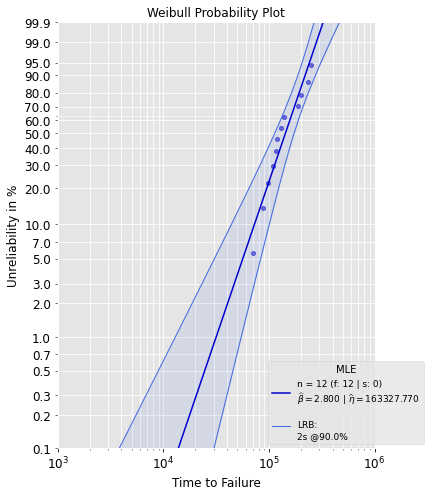

In [ ]:
# Data from testing
failures = [200000,130000, 120000, 70000, 250000, 187000, 140000, 232000, 116000, 87000, 97000, 110000]

# Weibull Analysis
W = Analysis(df=failures, show=True, bounds='lrb', bounds_type='2s')
W.mle()

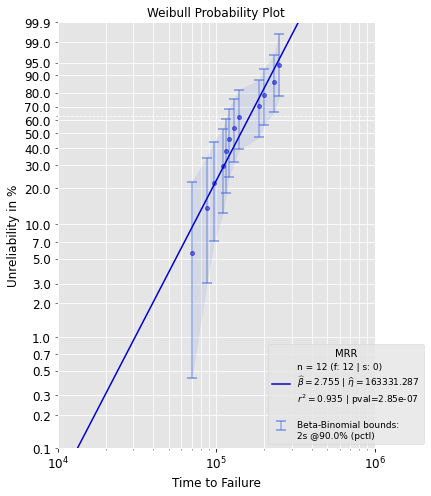

In [ ]:
# Data from testing
failures = [200000,130000, 120000, 70000, 250000, 187000, 140000, 232000, 116000, 87000, 97000, 110000]
# Weibull Analysis with two-sided bounds and a plot
W = Analysis(df=failures,show=True, bounds='bbb', bounds_type='2s')
W.mrr()